<a href="https://colab.research.google.com/github/Mehul6112/Data-Science_curve/blob/main/ML_cheatsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Cheatsheet with Scikit-Learn

## Introduction

Welcome to the Machine Learning Cheatsheet! In this notebook, we'll cover some fundamental concepts and code snippets using the Scikit-Learn library for machine learning tasks.


# Importing Libraries

In [ ]:
#Let's start by importing the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Loading Data
Next, we'll load our dataset into a pandas DataFrame. Replace 'dataset.csv' with the path to your dataset file.

In [ ]:
digits = datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

The digits variable is a dictionary-like object that contains the following attributes:

* data: A NumPy array of shape (n_samples, n_features) containing the data points (images of handwritten digits) represented as flattened arrays of pixel intensities.
* target: A NumPy array of shape (n_samples,) containing the corresponding labels (0-9) for each data point.
* images: A NumPy array of shape (n_samples, 8, 8) containing the data points as 8x8 grayscale images.
* DESCR: A string containing a description of the dataset.

## Data Exploration
Before diving into modeling, let's explore the dataset to understand its structure and characteristics.

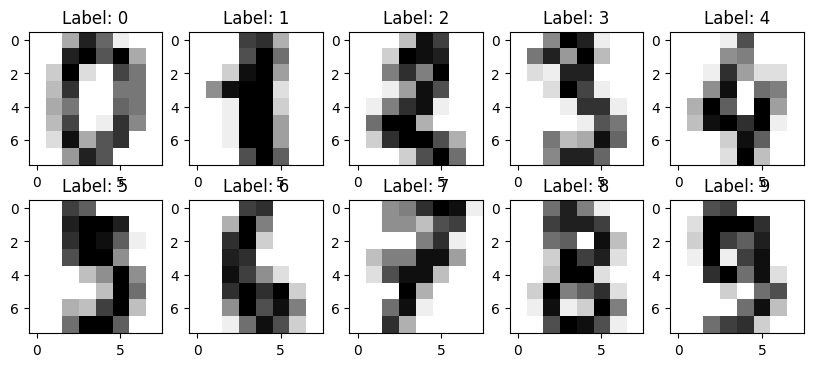

In [ ]:
# Visualize the first few images and their labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for ax, image, label in zip(axes.flat, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Label: {label}")
plt.show()

## Training and Testing

In [ ]:
# Prepare data
X = digits.data
y = digits.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

digit_model = LogisticRegression(random_state = 42)
digit_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Calculate accuracy
y_pred = digit_model.predict(X_test)
LOG_score = digit_model.score(X_test, y_test)
LOG_score

0.9685185185185186

## Generate confusion matrix and classification report

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test)

Text(95.72222222222221, 0.5, 'Truth')

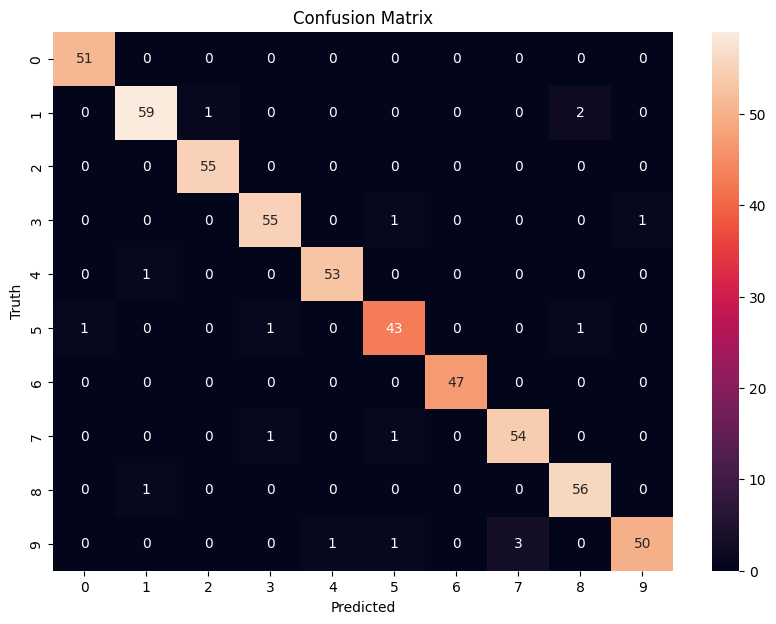

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.95      0.97      0.96        61
           2       1.00      0.98      0.99        56
           3       0.96      0.96      0.96        57
           4       0.98      0.98      0.98        54
           5       0.93      0.93      0.93        46
           6       1.00      1.00      1.00        47
           7       0.96      0.95      0.96        57
           8       0.98      0.95      0.97        59
           9       0.91      0.98      0.94        51

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



## Now let's train our dataset using different models like SVM(support vector machine), Random Forest & Decision Tree and compare them.

In [ ]:
svm_model = SVC(C=10, kernel = "rbf")
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)

In [ ]:
rfc_model = RFC(n_estimators = 5)
rfc_model.fit(X_train, y_train)
rfc_score = rfc_model.score(X_test, y_test)

In [ ]:
dtc_model = DTC()
dtc_model.fit(X_train, y_train)
dtc_score = dtc_model.score(X_test, y_test)

We can clearly see that different models have slight variations in predicting target from testing dataset.

Text(0.5, 1.0, 'Model Accuracy')

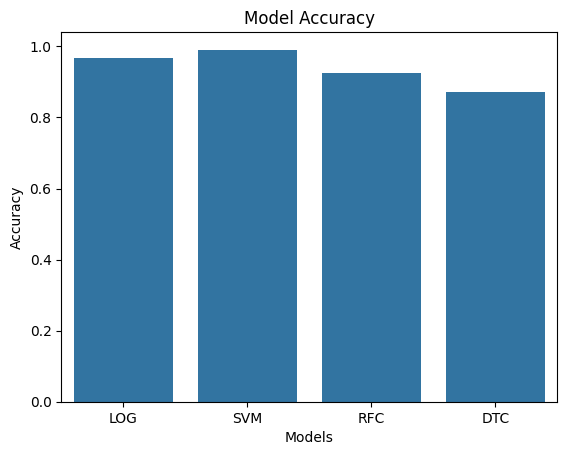

In [ ]:
sns.barplot(x = ["LOG", 'SVM', 'RFC', 'DTC'], y = [LOG_score, svm_score, rfc_score, dtc_score])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")

But the above scores are not guaranteed as if we run train_test_split multiple times we would get differert sets of training and testing data which changes the overall accuracy of our models, so instead we can use KFold to create multiple folds of our train_test_split and then take average of these folds to get a concrete score for each model.

Below code is to do just that.

#KFold Analysis


In [ ]:

def get_scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

svm_score = []
rfc_score = []
dtc_score = []
log_score = []
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    svm_score.append(get_scores(SVC(C=10, kernel = "rbf"), X_train, X_test, y_train, y_test))
    rfc_score.append(get_scores(RFC(n_estimators = 5), X_train, X_test, y_train, y_test))
    dtc_score.append(get_scores(DTC(), X_train, X_test, y_train, y_test))
    log_score.append(get_scores(LogisticRegression(random_state = 42), X_train, X_test, y_train, y_test))


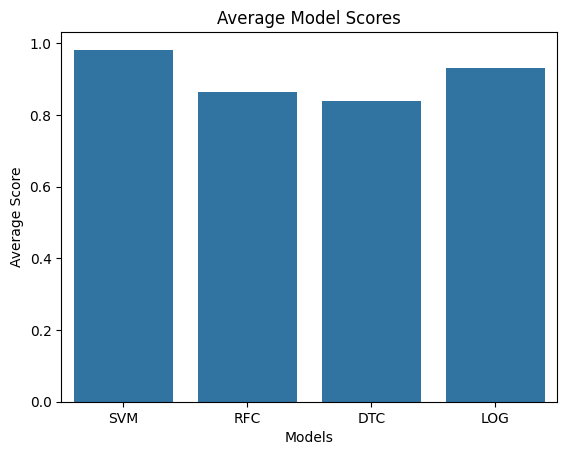

In [ ]:
model_names = ["SVM", "RFC", "DTC", "LOG"]
average_scores = [np.mean(svm_score), np.mean(rfc_score), np.mean(dtc_score), np.mean(log_score)]

sns.barplot(x=model_names, y=average_scores)
plt.xlabel("Models")
plt.ylabel("Average Score")
plt.title("Average Model Scores")
plt.show()


Above function can be tedious so instead we can also import cross_val_score to get same array of scores fro each models but in fewer lines of code.

In [ ]:
from sklearn.model_selection import cross_val_score

svm_score = cross_val_score(SVC(), X, y, cv = 10)
rfc_score = cross_val_score(RFC(n_estimators = 5), X, y, cv = 10)
dtc_score = cross_val_score(DTC(), X, y, cv = 10)
log_score = cross_val_score(LogisticRegression(random_state = 42), X, y, cv = 10)


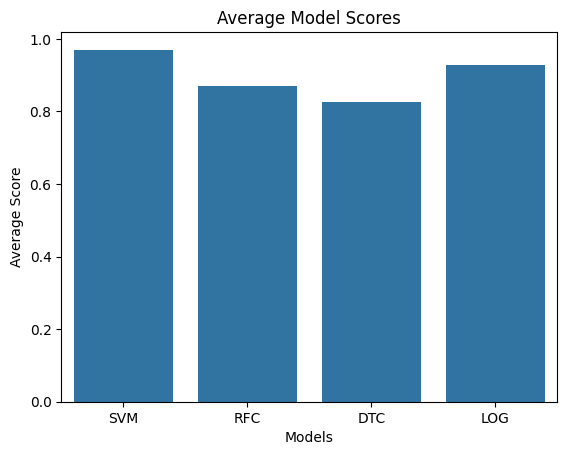

In [ ]:
model_names = ["SVM", "RFC", "DTC", "LOG"]
average_scores = [np.mean(svm_score), np.mean(rfc_score), np.mean(dtc_score), np.mean(log_score)]

sns.barplot(x=model_names, y=average_scores)
plt.xlabel("Models")
plt.ylabel("Average Score")
plt.title("Average Model Scores")
plt.show()


# Hypertuning using GridSearchCV

In [ ]:
model_params = {
    'log_reg': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'RFC': {
        'model': RFC(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'DTC': {
        'model': DTC(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}
score = []

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    grid_search.fit(X, y)

    score.append({
        'model_name': model_name,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    })


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
df = pd.DataFrame(score, columns = ["model_name", "best_score", "best_params"])
df

,model_name,best_score,best_params
0,log_reg,0.924342,"{'C': 0.1, 'solver': 'liblinear'}"
1,RFC,0.938250,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."
2,DTC,0.788573,"{'max_depth': None, 'min_samples_split': 2}"
3,SVM,0.973850,"{'C': 10, 'kernel': 'rbf'}"
